In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mutual_info_score
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

### Data cleaning and preparation

In [2]:
df = pd.read_csv('data.csv')

In [3]:
df.columns = df.columns.str.lower()

In [4]:
status_values = {
    1: 'ok', 
    2: 'default', 
    0: 'ink'
}
df.status = df.status.map(status_values)

In [5]:
home_values = {
    1: 'rent',
    2: 'owner',
    3: 'private',
    4: 'ignore',
    5: 'parents',
    6: 'other',
    0: 'unk'
}

df.home = df.home.map(home_values)

marital_values = {
    1: 'single',
    2: 'married',
    3: 'widow',
    4: 'separated',
    5: 'divorced',
    0: 'unk'
}

df.marital = df.marital.map(marital_values)

records_values = {
    1: 'no',
    2: 'yes',
    0: 'unk'
}

df.records = df.records.map(records_values)

job_values = {
    1: 'fixed',
    2: 'partime',
    3: 'freelance',
    4: 'others',
    0: 'unk'
}

df.job = df.job.map(job_values)

1 Status	credit status
2 Seniority	job seniority (years)
3 Home	type of home ownership
4 Time	time of requested loan
5 Age	client's age
6 Marital	marital status
7 Records	existance of records
8 Job	type of job
9 Expenses	amount of expenses
10 Income	amount of income
11 Assets	amount of assets
12 Debt	amount of debt
13 Amount	amount requested of loan
14 Price	price of good

In [6]:
df.head()

,status,seniority,home,time,age,marital,records,job,expenses,income,assets,debt,amount,price
0,ok,9,rent,60,30,married,no,freelance,73,129,0,0,800,846
1,ok,17,rent,60,58,widow,no,fixed,48,131,0,0,1000,1658
2,default,10,owner,36,46,married,yes,freelance,90,200,3000,0,2000,2985
3,ok,0,rent,60,24,single,no,fixed,63,182,2500,0,900,1325
4,ok,0,rent,36,26,single,no,fixed,46,107,0,0,310,910


In [7]:
df.describe().round()

,seniority,time,age,expenses,income,assets,debt,amount,price
count,4455.0,4455.0,4455.0,4455.0,4455.0,4455.0,4455.0,4455.0,4455.0
mean,8.0,46.0,37.0,56.0,763317.0,1060341.0,404382.0,1039.0,1463.0
std,8.0,15.0,11.0,20.0,8703625.0,10217569.0,6344253.0,475.0,628.0
min,0.0,6.0,18.0,35.0,0.0,0.0,0.0,100.0,105.0
25%,2.0,36.0,28.0,35.0,80.0,0.0,0.0,700.0,1118.0
50%,5.0,48.0,36.0,51.0,120.0,3500.0,0.0,1000.0,1400.0
75%,12.0,60.0,45.0,72.0,166.0,6000.0,0.0,1300.0,1692.0
max,48.0,72.0,68.0,180.0,99999999.0,99999999.0,99999999.0,5000.0,11140.0


In [8]:
for c in ['income', 'assets', 'debt']:
    df[c] = df[c].replace(to_replace=99999999, value=np.nan)

In [9]:
df = df[df.status !='ink'].reset_index(drop=True)

In [10]:
df_full_train, df_test = train_test_split(df, test_size = 0.2, random_state=11)

### EDA

In [11]:
numerical = [
    'seniority', 'time', 'age', 'expenses', 
    'income', 'assets', 'debt', 'amount', 'price'
]

In [12]:
categorical = [
    'home', 'marital', 'records', 'job'
]

In [13]:
df_full_train = df_full_train.reset_index(drop=True)

In [14]:
df_full_train.isna().sum()

status        0
seniority     0
home          0
time          0
age           0
marital       0
records       0
job           0
expenses      0
income       30
assets       38
debt         14
amount        0
price         0
dtype: int64

##### Numerical

In [15]:
df_full_train[numerical].describe()

,seniority,time,age,expenses,income,assets,debt,amount,price
count,3563.000000,3563.000000,3563.000000,3563.000000,3533.000000,3525.000000,3549.000000,3563.000000,3563.000000
mean,7.961269,46.383385,36.931799,55.344373,130.018681,5329.801418,339.229079,1032.092899,1458.136121
std,8.146756,14.735172,10.908615,19.443770,84.129334,10849.081006,1262.184789,462.438642,620.990569
min,0.000000,6.000000,18.000000,35.000000,0.000000,0.000000,0.000000,100.000000,105.000000
25%,2.000000,36.000000,28.000000,35.000000,80.000000,0.000000,0.000000,700.000000,1119.000000
50%,5.000000,48.000000,35.000000,49.000000,120.000000,3000.000000,0.000000,1000.000000,1400.000000
75%,12.000000,60.000000,45.000000,71.000000,164.000000,6000.000000,0.000000,1300.000000,1686.000000
max,47.000000,72.000000,68.000000,180.000000,905.000000,300000.000000,30000.000000,4000.000000,11140.000000


Plot histograms with kernel density estimate to smooth the histogram, providing complementary information about the shape of the distribution. Plot box plots as well to understand outliers.

<AxesSubplot:xlabel='age'>

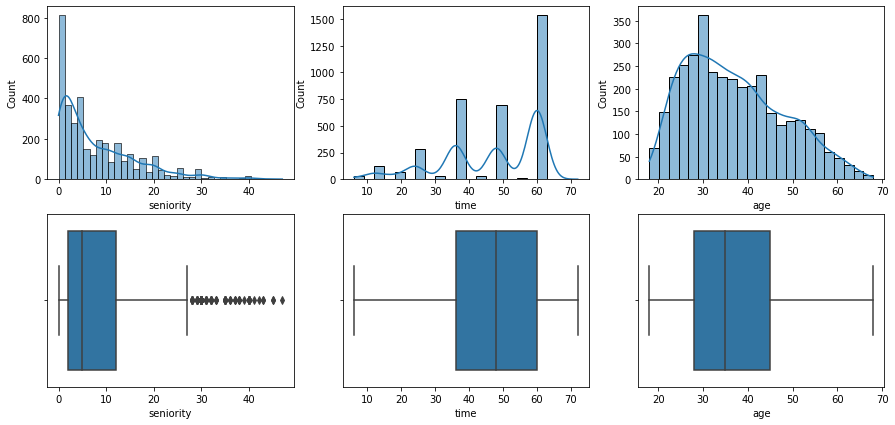

In [16]:
_, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 7))
sns.histplot(data=df_full_train, x="seniority", kde=True, ax=axes[0, 0])
sns.histplot(data=df_full_train, x="time", kde=True, ax=axes[0, 1])
sns.histplot(data=df_full_train, x="age", kde=True, ax=axes[0, 2])
sns.boxplot(data=df_full_train, x="seniority", ax=axes[1, 0])
sns.boxplot(data=df_full_train, x="time", ax=axes[1, 1])
sns.boxplot(data=df_full_train, x="age", ax=axes[1, 2])

<AxesSubplot:xlabel='assets'>

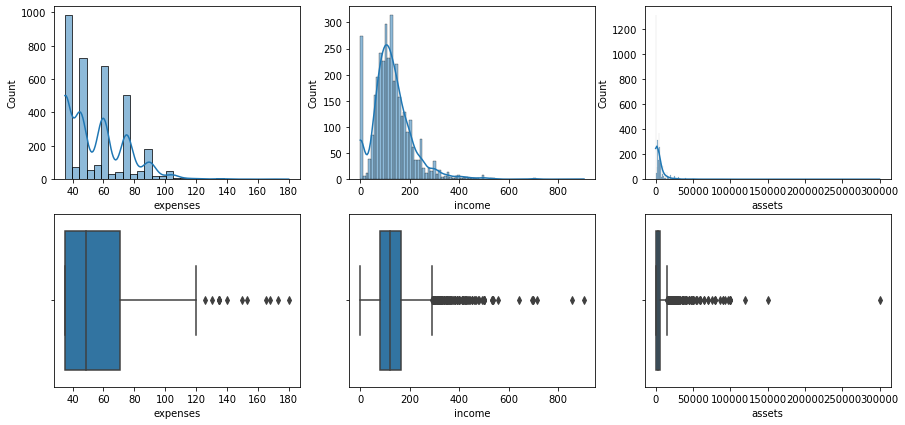

In [17]:
_, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 7))
sns.histplot(data=df_full_train, x="expenses", kde=True, ax=axes[0, 0])
sns.histplot(data=df_full_train, x="income", kde=True, ax=axes[0, 1])
sns.histplot(data=df_full_train, x="assets", kde=True, ax=axes[0, 2])
sns.boxplot(data=df_full_train, x="expenses", ax=axes[1, 0])
sns.boxplot(data=df_full_train, x="income", ax=axes[1, 1])
sns.boxplot(data=df_full_train, x="assets", ax=axes[1, 2])

<AxesSubplot:xlabel='price'>

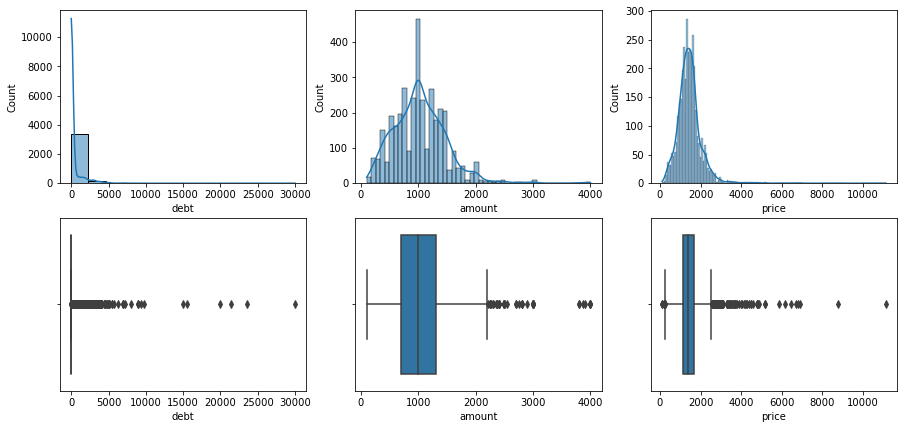

In [18]:
_, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 7))
sns.histplot(data=df_full_train, x="debt", kde=True, ax=axes[0, 0])
sns.histplot(data=df_full_train, x="amount", kde=True, ax=axes[0, 1])
sns.histplot(data=df_full_train, x="price", kde=True, ax=axes[0, 2])
sns.boxplot(data=df_full_train, x="debt", ax=axes[1, 0])
sns.boxplot(data=df_full_train, x="amount", ax=axes[1, 1])
sns.boxplot(data=df_full_train, x="price", ax=axes[1, 2])

In [19]:
perc_99_dict = {}
for feature in numerical:
    perc_99 = np.percentile(df_full_train[feature].values[~np.isnan(df_full_train[feature].values)], 99)    
    print(f'{feature} 99% percentile is {perc_99:.1f}')
    perc_99_dict[feature] = perc_99

seniority 99% percentile is 35.0
time 99% percentile is 60.0
age 99% percentile is 63.0
expenses 99% percentile is 105.0
income 99% percentile is 424.7
assets 99% percentile is 50000.0
debt 99% percentile is 4500.0
amount 99% percentile is 2400.0
price 99% percentile is 3443.4


In [20]:
df['debt'] = df['debt'].fillna(0)
df['income'].fillna(value=df['income'].median(), inplace=True)
df['assets'].fillna(value=df['assets'].median(), inplace=True)

<AxesSubplot:title={'center':'Pearson Correlation of Numerical Features'}>

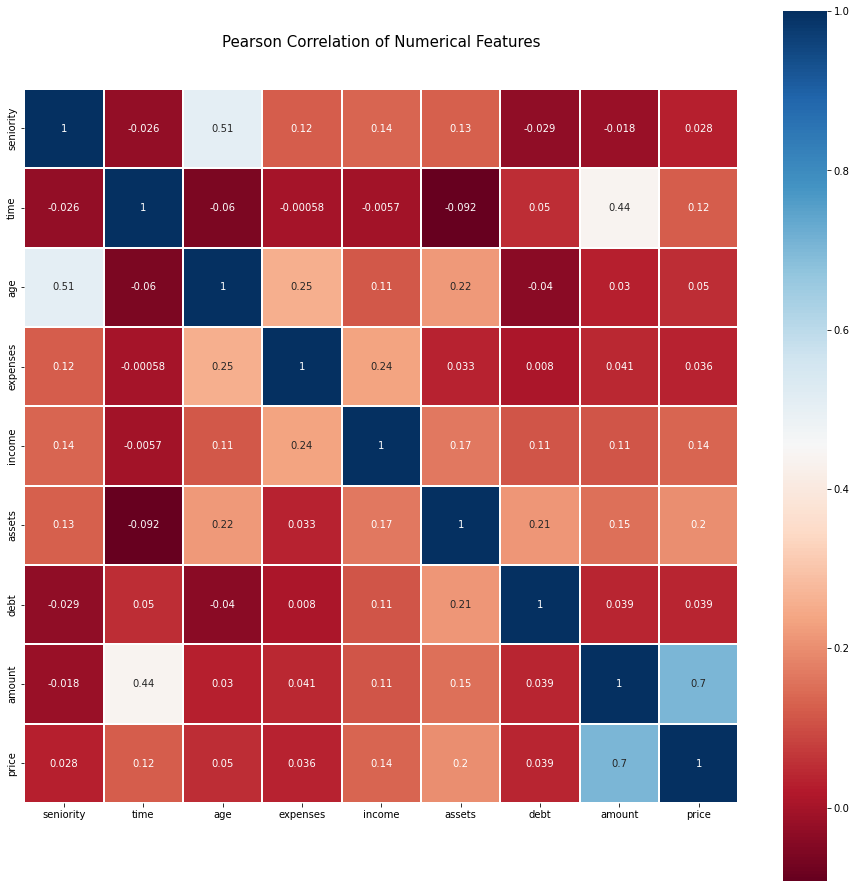

In [21]:
colormap = plt.cm.RdBu
plt.figure(figsize=(16,16))
plt.title('Pearson Correlation of Numerical Features', y=1.05, size=15)
sns.heatmap(df_full_train[numerical].corr(), linewidths=0.1, vmax=1.0, 
            square=True, cmap=colormap, linecolor='white', annot=True)

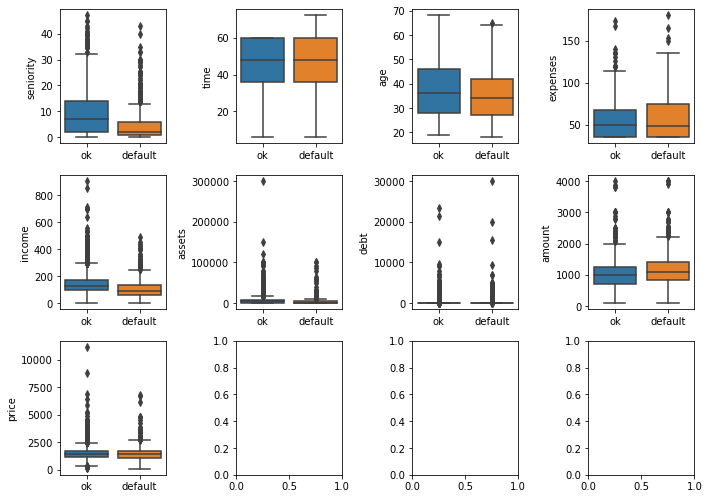

In [22]:
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(10, 7))
for idx, feature in enumerate(numerical):
    ax = axes[int(idx / 4), idx % 4]
    sns.boxplot(x='status', y=feature, data=df_full_train, ax=ax)
    ax.set_xlabel('')
    ax.set_ylabel(feature)
fig.tight_layout()

In [23]:
df_full_train[numerical].corrwith(df_full_train.status.map({'ok': 0, 'default':1}))

seniority   -0.258317
time         0.107026
age         -0.084724
expenses     0.023566
income      -0.217978
assets      -0.100726
debt         0.005280
amount       0.154918
price        0.008124
dtype: float64

##### Categorical

In [24]:
for cat in categorical:
    print(f'{cat} {mutual_info_score(df_full_train.status, df_full_train[cat]):.4f}')

home 0.0245
marital 0.0053
records 0.0382
job 0.0361


<AxesSubplot:xlabel='job', ylabel='count'>

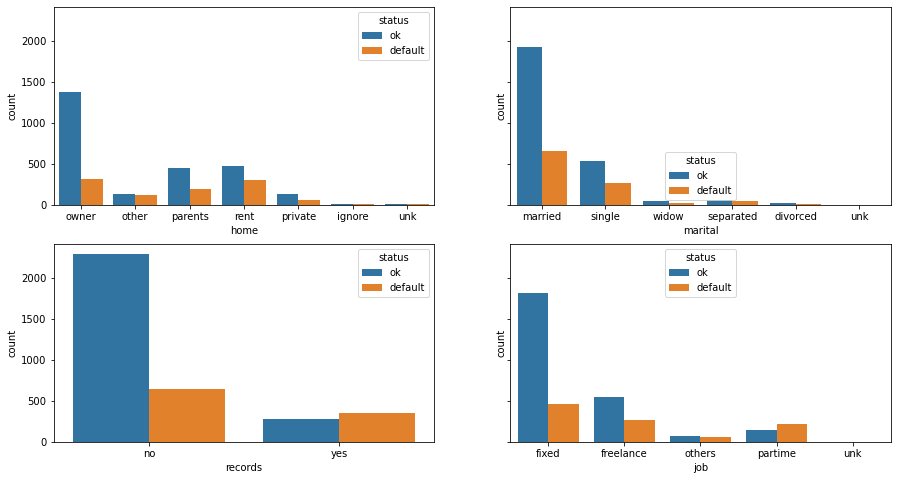

In [25]:
_, axes = plt.subplots(2, 2, sharey=True, figsize=(15, 8))

sns.countplot(x='home', hue='status', data=df_full_train, ax=axes[0, 0])
sns.countplot(x='marital', hue='status', data=df_full_train, ax=axes[0, 1])
sns.countplot(x='records', hue='status', data=df_full_train, ax=axes[1, 0])
sns.countplot(x='job', hue='status', data=df_full_train, ax=axes[1, 1])

### Decision trees

In [26]:
from sklearn.model_selection import train_test_split

df_full_train, df_test = train_test_split(df, test_size = 0.2, random_state=11)
df_train, df_val = train_test_split(df_full_train, test_size = 0.25, random_state=11)

In [27]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [28]:
y_train = (df_train.status == 'default').astype('int').values
y_val = (df_val.status == 'default').astype('int').values
y_test = (df_test.status == 'default').astype('int').values

In [29]:
del df_train['status']
del df_val['status']
del df_test['status']

In [30]:
def assess_risk(client):
    if client['records'] == 'yes':
        if client['job'] == 'parttime':
            return 'default'
        else:
            return 'ok'
    else:
        if client['assets'] > 6000:
            return 'ok'
        else:
            return 'default'

In [31]:
xi = df_train.iloc[0].to_dict()

In [32]:
assess_risk(xi)

'ok'

In [33]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_extraction import DictVectorizer
from sklearn.metrics import roc_auc_score

In [34]:
train_dicts = df_train.fillna(0).to_dict(orient='records')

In [35]:
dv = DictVectorizer(sparse=False)
X_train = dv.fit_transform(train_dicts)

In [36]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [37]:
val_dicts = df_val.fillna(0).to_dict(orient='records')
X_val = dv.transform(val_dicts)

In [38]:
y_pred = dt.predict_proba(X_val)[:, 1]

In [39]:
roc_auc_score(y_val, y_pred)

0.6570499624615533

In [40]:
y_pred = dt.predict_proba(X_train)[:, 1]
roc_auc_score(y_train, y_pred)

1.0

In [41]:
dt = DecisionTreeClassifier(max_depth=4)
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4)

In [42]:
y_pred = dt.predict_proba(X_train)[:, 1]
auc = roc_auc_score(y_train, y_pred)
print('train:', auc)

y_pred = dt.predict_proba(X_val)[:, 1]
auc = roc_auc_score(y_val, y_pred)
print('val:', auc)

train: 0.8143667962368317
val: 0.7594239664818


In [43]:
from sklearn.tree import export_text

In [44]:
print(export_text(dt, feature_names=dv.get_feature_names()))

|--- records=yes <= 0.50
|   |--- job=partime <= 0.50
|   |   |--- income <= 74.50
|   |   |   |--- assets <= 4250.00
|   |   |   |   |--- class: 0
|   |   |   |--- assets >  4250.00
|   |   |   |   |--- class: 0
|   |   |--- income >  74.50
|   |   |   |--- seniority <= 5.50
|   |   |   |   |--- class: 0
|   |   |   |--- seniority >  5.50
|   |   |   |   |--- class: 0
|   |--- job=partime >  0.50
|   |   |--- assets <= 8750.00
|   |   |   |--- time <= 27.00
|   |   |   |   |--- class: 0
|   |   |   |--- time >  27.00
|   |   |   |   |--- class: 1
|   |   |--- assets >  8750.00
|   |   |   |--- class: 0
|--- records=yes >  0.50
|   |--- seniority <= 6.50
|   |   |--- amount <= 862.50
|   |   |   |--- seniority <= 0.50
|   |   |   |   |--- class: 1
|   |   |   |--- seniority >  0.50
|   |   |   |   |--- class: 0
|   |   |--- amount >  862.50
|   |   |   |--- assets <= 8250.00
|   |   |   |   |--- class: 1
|   |   |   |--- assets >  8250.00
|   |   |   |   |--- class: 0
|   |--- seniorit

### Decision tree algorithm

In [45]:
data = [
    [8000, 'default'],
    [2000, 'default'],
    [   0, 'default'],
    [5000, 'ok'],
    [5000, 'ok'],
    [4000, 'ok'],
    [9000, 'ok'],
    [3000, 'default'],
]

df_example = pd.DataFrame(data, columns=['assets', 'status'])
df_example

,assets,status
0,8000,default
1,2000,default
2,0,default
3,5000,ok
4,5000,ok
5,4000,ok
6,9000,ok
7,3000,default


In [46]:
df_example.sort_values('assets')

,assets,status
2,0,default
1,2000,default
7,3000,default
5,4000,ok
3,5000,ok
4,5000,ok
0,8000,default
6,9000,ok


In [47]:
Ts = [0, 2000, 3000, 4000, 5000, 8000]

In [48]:
from IPython.display import display

In [49]:
for T in Ts:
    print(T)
    df_left = df_example[df_example.assets <= T]
    df_right = df_example[df_example.assets > T]
    
    display(df_left)
    print(df_left.status.value_counts(normalize=True))
    display(df_right)
    print(df_right.status.value_counts(normalize=True))
    
    print()

0


,assets,status
2,0,default


default    1.0
Name: status, dtype: float64


,assets,status
0,8000,default
1,2000,default
3,5000,ok
4,5000,ok
5,4000,ok
6,9000,ok
7,3000,default


ok         0.571429
default    0.428571
Name: status, dtype: float64

2000


,assets,status
1,2000,default
2,0,default


default    1.0
Name: status, dtype: float64


,assets,status
0,8000,default
3,5000,ok
4,5000,ok
5,4000,ok
6,9000,ok
7,3000,default


ok         0.666667
default    0.333333
Name: status, dtype: float64

3000


,assets,status
1,2000,default
2,0,default
7,3000,default


default    1.0
Name: status, dtype: float64


,assets,status
0,8000,default
3,5000,ok
4,5000,ok
5,4000,ok
6,9000,ok


ok         0.8
default    0.2
Name: status, dtype: float64

4000


,assets,status
1,2000,default
2,0,default
5,4000,ok
7,3000,default


default    0.75
ok         0.25
Name: status, dtype: float64


,assets,status
0,8000,default
3,5000,ok
4,5000,ok
6,9000,ok


ok         0.75
default    0.25
Name: status, dtype: float64

5000


,assets,status
1,2000,default
2,0,default
3,5000,ok
4,5000,ok
5,4000,ok
7,3000,default


default    0.5
ok         0.5
Name: status, dtype: float64


,assets,status
0,8000,default
6,9000,ok


default    0.5
ok         0.5
Name: status, dtype: float64

8000


,assets,status
0,8000,default
1,2000,default
2,0,default
3,5000,ok
4,5000,ok
5,4000,ok
7,3000,default


default    0.571429
ok         0.428571
Name: status, dtype: float64


,assets,status
6,9000,ok


ok    1.0
Name: status, dtype: float64



In [50]:
data = [
    [8000, 3000, 'default'],
    [2000, 1000, 'default'],
    [   0, 1000, 'default'],
    [5000, 1000, 'ok'],
    [5000, 1000, 'ok'],
    [4000, 1000, 'ok'],
    [9000, 500, 'ok'],
    [3000, 2000, 'default'],
]

df_example = pd.DataFrame(data, columns=['assets', 'debt', 'status'])
df_example

,assets,debt,status
0,8000,3000,default
1,2000,1000,default
2,0,1000,default
3,5000,1000,ok
4,5000,1000,ok
5,4000,1000,ok
6,9000,500,ok
7,3000,2000,default


In [51]:
df_example.sort_values('debt')

,assets,debt,status
6,9000,500,ok
1,2000,1000,default
2,0,1000,default
3,5000,1000,ok
4,5000,1000,ok
5,4000,1000,ok
7,3000,2000,default
0,8000,3000,default


In [52]:
thresholds = {
    'assets': [0, 2000, 3000, 4000, 5000, 8000],
    'debt': [500, 1000, 2000]
}

In [53]:
for feature, Ts in thresholds.items():
    print('################')
    print(feature)
    for T in Ts:
        print(T)
        df_left = df_example[df_example[feature] <= T]
        df_right = df_example[df_example[feature] > T]

        display(df_left)
        print(df_left.status.value_counts(normalize=True))
        display(df_right)
        print(df_right.status.value_counts(normalize=True))

        print()
    print('################')

################
assets
0


,assets,debt,status
2,0,1000,default


default    1.0
Name: status, dtype: float64


,assets,debt,status
0,8000,3000,default
1,2000,1000,default
3,5000,1000,ok
4,5000,1000,ok
5,4000,1000,ok
6,9000,500,ok
7,3000,2000,default


ok         0.571429
default    0.428571
Name: status, dtype: float64

2000


,assets,debt,status
1,2000,1000,default
2,0,1000,default


default    1.0
Name: status, dtype: float64


,assets,debt,status
0,8000,3000,default
3,5000,1000,ok
4,5000,1000,ok
5,4000,1000,ok
6,9000,500,ok
7,3000,2000,default


ok         0.666667
default    0.333333
Name: status, dtype: float64

3000


,assets,debt,status
1,2000,1000,default
2,0,1000,default
7,3000,2000,default


default    1.0
Name: status, dtype: float64


,assets,debt,status
0,8000,3000,default
3,5000,1000,ok
4,5000,1000,ok
5,4000,1000,ok
6,9000,500,ok


ok         0.8
default    0.2
Name: status, dtype: float64

4000


,assets,debt,status
1,2000,1000,default
2,0,1000,default
5,4000,1000,ok
7,3000,2000,default


default    0.75
ok         0.25
Name: status, dtype: float64


,assets,debt,status
0,8000,3000,default
3,5000,1000,ok
4,5000,1000,ok
6,9000,500,ok


ok         0.75
default    0.25
Name: status, dtype: float64

5000


,assets,debt,status
1,2000,1000,default
2,0,1000,default
3,5000,1000,ok
4,5000,1000,ok
5,4000,1000,ok
7,3000,2000,default


default    0.5
ok         0.5
Name: status, dtype: float64


,assets,debt,status
0,8000,3000,default
6,9000,500,ok


default    0.5
ok         0.5
Name: status, dtype: float64

8000


,assets,debt,status
0,8000,3000,default
1,2000,1000,default
2,0,1000,default
3,5000,1000,ok
4,5000,1000,ok
5,4000,1000,ok
7,3000,2000,default


default    0.571429
ok         0.428571
Name: status, dtype: float64


,assets,debt,status
6,9000,500,ok


ok    1.0
Name: status, dtype: float64

################
################
debt
500


,assets,debt,status
6,9000,500,ok


ok    1.0
Name: status, dtype: float64


,assets,debt,status
0,8000,3000,default
1,2000,1000,default
2,0,1000,default
3,5000,1000,ok
4,5000,1000,ok
5,4000,1000,ok
7,3000,2000,default


default    0.571429
ok         0.428571
Name: status, dtype: float64

1000


,assets,debt,status
1,2000,1000,default
2,0,1000,default
3,5000,1000,ok
4,5000,1000,ok
5,4000,1000,ok
6,9000,500,ok


ok         0.666667
default    0.333333
Name: status, dtype: float64


,assets,debt,status
0,8000,3000,default
7,3000,2000,default


default    1.0
Name: status, dtype: float64

2000


,assets,debt,status
1,2000,1000,default
2,0,1000,default
3,5000,1000,ok
4,5000,1000,ok
5,4000,1000,ok
6,9000,500,ok
7,3000,2000,default


ok         0.571429
default    0.428571
Name: status, dtype: float64


,assets,debt,status
0,8000,3000,default


default    1.0
Name: status, dtype: float64

################


### Decision trees parameters tuning

In [54]:
for d in [1, 2, 3, 4, 5, 6, 10, 15, 20, None]:
    dt = DecisionTreeClassifier(max_depth=d)
    dt.fit(X_train, y_train)
    
    y_pred = dt.predict_proba(X_val)[:, 1]
    auc = roc_auc_score(y_val, y_pred)
    
    print(f'{d} -> {auc:.3f}')

1 -> 0.606
2 -> 0.669
3 -> 0.738
4 -> 0.759
5 -> 0.767
6 -> 0.747
10 -> 0.659
15 -> 0.641
20 -> 0.640
None -> 0.653


In [55]:
scores = []

for d in [4, 5, 6, 7, 10, 15, 20, None]:
    for s in [1, 2, 5, 10, 15, 20, 100, 200, 500]:
        dt = DecisionTreeClassifier(max_depth=d, min_samples_leaf=s)
        dt.fit(X_train, y_train)

        y_pred = dt.predict_proba(X_val)[:, 1]
        auc = roc_auc_score(y_val, y_pred)
        
        scores.append((d, s, auc))

In [56]:
columns = ['max_depth', 'min_samples_leaf', 'auc']
df_scores = pd.DataFrame(scores, columns=columns)
df_scores.head()

,max_depth,min_samples_leaf,auc
0,4.0,1,0.759424
1,4.0,2,0.759424
2,4.0,5,0.759424
3,4.0,10,0.759424
4,4.0,15,0.763069


In [57]:
df_scores.sort_values(by='auc', ascending=False).head()

,max_depth,min_samples_leaf,auc
41,10.0,20,0.782979
50,15.0,20,0.781572
59,20.0,20,0.781293
67,NaN,15,0.781254
49,15.0,15,0.781199


In [58]:
df_scores_pivot = df_scores.pivot(index='min_samples_leaf', 
                                  columns=['max_depth'], 
                                  values=['auc'])
df_scores_pivot.round(3)

auc                                                 
max_depth           NaN   4.0    5.0    6.0    7.0    10.0   15.0   20.0
min_samples_leaf                                                        
1                 0.655  0.759  0.767  0.747  0.720  0.669  0.629  0.649
2                 0.682  0.759  0.767  0.751  0.738  0.712  0.682  0.674
5                 0.713  0.759  0.768  0.754  0.731  0.719  0.727  0.716
10                0.756  0.759  0.762  0.759  0.761  0.761  0.755  0.757
15                0.781  0.763  0.766  0.772  0.776  0.780  0.781  0.781
20                0.781  0.760  0.765  0.763  0.772  0.783  0.782  0.781
100               0.772  0.754  0.762  0.771  0.773  0.772  0.772  0.772
200               0.766  0.745  0.757  0.766  0.766  0.766  0.766  0.766
500               0.678  0.678  0.678  0.678  0.678  0.678  0.678  0.678

<AxesSubplot:xlabel='None-max_depth', ylabel='min_samples_leaf'>

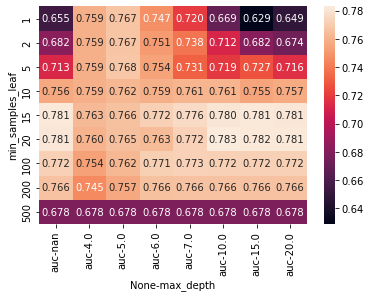

In [59]:
sns.heatmap(df_scores_pivot, annot=True, fmt='.3f')

In [60]:
dt = DecisionTreeClassifier(max_depth=6, min_samples_leaf=15)
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=6, min_samples_leaf=15)

### Ensembles and random forest

In [61]:
from sklearn.ensemble import RandomForestClassifier

In [62]:
rf = RandomForestClassifier(n_estimators=10, random_state=1)
rf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=10, random_state=1)

In [63]:
y_pred = rf.predict_proba(X_val)[:, 1]

In [64]:
roc_auc_score(y_val, y_pred)

0.7786079290886634

In [65]:
rf.predict_proba(X_val[[0]])

array([[0.8, 0.2]])

In [66]:
scores = []

for n in range(10, 201, 10):
    rf = RandomForestClassifier(n_estimators=n, random_state=1)
    rf.fit(X_train, y_train)
    
    y_pred = rf.predict_proba(X_val)[:, 1]
    auc = roc_auc_score(y_val, y_pred)
    scores.append((n, auc))

In [67]:
df_scores = pd.DataFrame(scores, columns=['n_estimators', 'auc'])

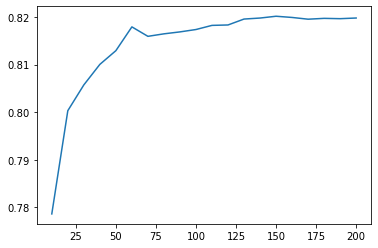

In [68]:
plt.plot(df_scores.n_estimators, df_scores.auc)

In [69]:
scores = []

for d in [5, 10, 15]:
    for n in range(10, 201, 10):
        rf = RandomForestClassifier(n_estimators=n, 
                                    max_depth=d, 
                                    random_state=1)
        rf.fit(X_train, y_train)

        y_pred = rf.predict_proba(X_val)[:, 1]
        auc = roc_auc_score(y_val, y_pred)
        scores.append((d, n, auc))

In [70]:
columns = ['max_depth', 'n_estimators', 'auc']
df_scores = pd.DataFrame(scores, columns=columns)

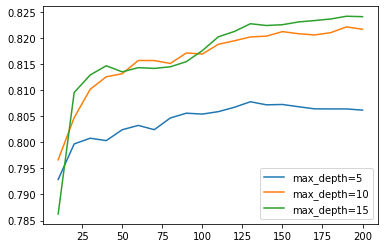

In [71]:
for d in [5, 10, 15]:
    df_subset = df_scores[df_scores.max_depth == d]
    plt.plot(df_subset.n_estimators, df_subset.auc, label=f'max_depth={d}')

plt.legend()

In [72]:
max_depth = 15

In [73]:
scores = []

for s in [1, 3, 5, 10, 50]:
    for n in range(10, 201, 10):
        rf = RandomForestClassifier(n_estimators=n, 
                                    max_depth=max_depth, 
                                    min_samples_leaf=s,
                                    random_state=1)
        rf.fit(X_train, y_train)

        y_pred = rf.predict_proba(X_val)[:, 1]
        auc = roc_auc_score(y_val, y_pred)
        scores.append((s, n, auc))

In [74]:
columns = ['min_samples_leaf', 'n_estimators', 'auc']
df_scores = pd.DataFrame(scores, columns=columns)

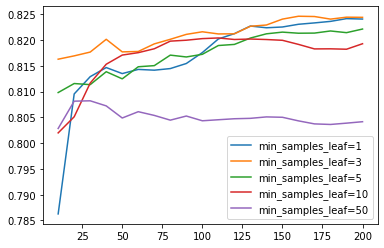

In [75]:
for s in [1, 3, 5, 10, 50]:
    df_subset = df_scores[df_scores.min_samples_leaf == s]
    plt.plot(df_subset.n_estimators, df_subset.auc, label=f'min_samples_leaf={s}')

plt.legend()

In [76]:
min_samples_leaf = 3

In [77]:
rf = RandomForestClassifier(n_estimators=100,
                            max_depth=max_depth, 
                            min_samples_leaf=min_samples_leaf,
                            random_state=1)
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=15, min_samples_leaf=3, random_state=1)

### Gradient boosting and XGBoost

In [78]:
import xgboost as xgb

In [79]:
features = dv.get_feature_names()
dtrain = xgb.DMatrix(X_train, label=y_train, feature_names=features)
dval = xgb.DMatrix(X_val, label=y_val, feature_names=features)

In [80]:
xgb_params = {
    'eta': 0.3,
    'max_depth': 6, 
    'min_child_weight': 1,
    
    'objective': 'binary:logistic',
    'nthread': 8,
    
    'seed': 1,
    'verbosity': 1,
}
model = xgb.train(xgb_params, dtrain, num_boost_round=10)

[12:49:53] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1631904775127/work/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [81]:
y_pred = model.predict(dval)

In [82]:
roc_auc_score(y_val, y_pred)

0.8127891065849701

In [83]:
watchlist = [(dtrain, 'train'), (dval, 'val')]

In [84]:
%%capture output

xgb_params = {
    'eta': 0.3,
    'max_depth': 6, 
    'min_child_weight': 1,
    
    'objective': 'binary:logistic',
    'eval_metric': 'auc',
    
    'nthread': 8,
    'seed': 1,
    'verbosity': 1,
}
model = xgb.train(xgb_params, dtrain, num_boost_round=200, 
                  verbose_eval=5, evals=watchlist)

In [85]:
line = output.stdout.split('\n')[0]

In [86]:
num_iter, train_auc, val_auc = line.split('\t')

In [87]:
int(num_iter.strip('[]'))

0

In [88]:
float(train_auc.split(':')[1])

0.86254

In [89]:
float(val_auc.split(':')[1])

0.76757

In [90]:
def parse_xgb_output(output):
    results = []

    for line in output.stdout.strip().split('\n'):
        it_line, train_line, val_line = line.split('\t')

        it = int(it_line.strip('[]'))
        train = float(train_line.split(':')[1])
        val = float(val_line.split(':')[1])

        results.append((it, train, val))
    
    columns = ['num_iter', 'train_auc', 'val_auc']
    df_results = pd.DataFrame(results, columns=columns)
    return df_results

In [91]:
df_score = parse_xgb_output(output)

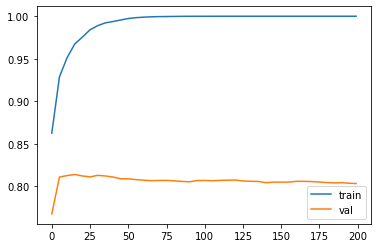

In [92]:
plt.plot(df_score.num_iter, df_score.train_auc, label='train')
plt.plot(df_score.num_iter, df_score.val_auc, label='val')
plt.legend()

### XGBoost tuning parameters

eta = learning rate, step size, how much predictions we correct from previous model

In [93]:
scores = {}

In [101]:
%%capture output

xgb_params = {
    'eta': 0.01,
    'max_depth': 6, 
    'min_child_weight': 1,
    
    'objective': 'binary:logistic',
    'eval_metric': 'auc',
    
    'nthread': 8,
    'seed': 1,
    'verbosity': 1,
}
model = xgb.train(xgb_params, dtrain, num_boost_round=200, 
                  verbose_eval=5, evals=watchlist)

In [102]:
key = 'eta=%s' % (xgb_params['eta'])
scores[key] = parse_xgb_output(output)

In [103]:
scores.keys()

dict_keys(['eta=0.1', 'eta=0.05', 'eta=0.01'])

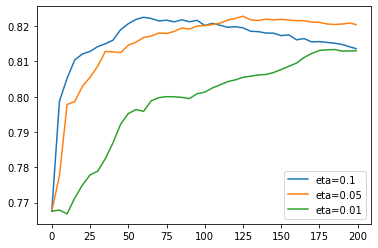

In [104]:
etas = ['eta=0.1', 'eta=0.05', 'eta=0.01']

for eta in etas:
    df_score = scores[eta]
    plt.plot(df_score.num_iter, df_score.val_auc, label=eta)
plt.legend()

In [105]:
scores = {}

In [115]:
%%capture output

xgb_params = {
    'eta': 0.05,
    'max_depth': 3, 
    'min_child_weight': 1,
    
    'objective': 'binary:logistic',
    'eval_metric': 'auc',
    
    'nthread': 8,
    'seed': 1,
    'verbosity': 1,
}
model = xgb.train(xgb_params, dtrain, num_boost_round=200, 
                  verbose_eval=5, evals=watchlist)

In [116]:
key = 'max_depth=%s' % (xgb_params['max_depth'])
scores[key] = parse_xgb_output(output)
key

'max_depth=3'

In [ ]:
del scores['max_depth=10']

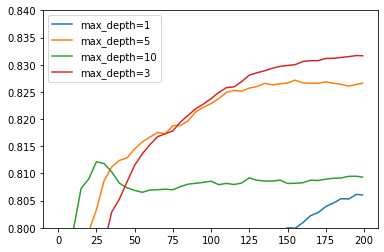

In [117]:
for max_depth, df_score in scores.items():
    plt.plot(df_score.num_iter, df_score.val_auc, label=max_depth)
    
plt.ylim(0.8, 0.84)
plt.legend()

In [118]:
scores = {}

In [125]:
%%capture output

xgb_params = {
    'eta': 0.05,
    'max_depth': 3, 
    'min_child_weight': 10,
    
    'objective': 'binary:logistic',
    'eval_metric': 'auc',
    
    'nthread': 8,
    'seed': 1,
    'verbosity': 1,
}
model = xgb.train(xgb_params, dtrain, num_boost_round=200, 
                  verbose_eval=5, evals=watchlist)

In [126]:
key = 'min_child_weight=%s' % (xgb_params['min_child_weight'])
scores[key] = parse_xgb_output(output)
key

'min_child_weight=10'

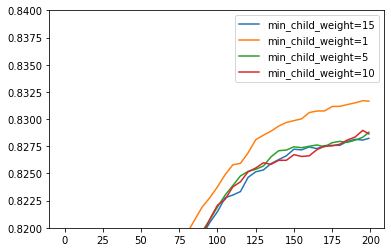

In [127]:
for min_child_weight, df_score in scores.items():
    plt.plot(df_score.num_iter, df_score.val_auc, label=min_child_weight)
    
plt.ylim(0.82, 0.84)
plt.legend()

In [128]:
xgb_params = {
    'eta': 0.05,
    'max_depth': 3, 
    'min_child_weight': 1,
    
    'objective': 'binary:logistic',
    'eval_metric': 'auc',
    
    'nthread': 8,
    'seed': 1,
    'verbosity': 1,
}
model = xgb.train(xgb_params, dtrain, num_boost_round=175)

### Selecting the best model

In [129]:
dt = DecisionTreeClassifier(max_depth=6, min_samples_leaf=15)
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=6, min_samples_leaf=15)

In [130]:
y_pred = dt.predict_proba(X_val)[:, 1]
roc_auc_score(y_val, y_pred)

0.771820735753554

In [131]:
rf = RandomForestClassifier(n_estimators=200, 
                            max_depth=10, 
                            min_samples_leaf=3, 
                            random_state=1)
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, min_samples_leaf=3, n_estimators=200,
                       random_state=1)

In [132]:
y_pred = rf.predict_proba(X_val)[:, 1]
roc_auc_score(y_val, y_pred)

0.8234149088179022

In [133]:
xgb_params = {
    'eta': 0.05,
    'max_depth': 3, 
    'min_child_weight': 1,
    
    'objective': 'binary:logistic',
    'eval_metric': 'auc',
    
    'nthread': 8,
    'seed': 1,
    'verbosity': 1,
}
model = xgb.train(xgb_params, dtrain, num_boost_round=175)

In [134]:
y_pred = model.predict(dval)
roc_auc_score(y_val, y_pred)

0.8311042357898817

In [135]:
df_full_train = df_full_train.reset_index(drop=True)

In [136]:
y_full_train = (df_full_train.status == 'default').astype(int).values

In [137]:
del df_full_train['status']

In [138]:
dicts_full_train = df_full_train.to_dict(orient='records')

dv = DictVectorizer(sparse=False)
X_full_train = dv.fit_transform(dicts_full_train)

dicts_test = df_test.to_dict(orient='records')
X_test = dv.transform(dicts_test)

In [139]:
dfulltrain = xgb.DMatrix(X_full_train, 
                         label=y_full_train, 
                         feature_names=dv.get_feature_names())
dtest = xgb.DMatrix(X_test, feature_names=dv.get_feature_names())

In [140]:
xgb_params = {
    'eta': 0.05,
    'max_depth': 3, 
    'min_child_weight': 1,
    
    'objective': 'binary:logistic',
    'eval_metric': 'auc',
    
    'nthread': 8,
    'seed': 1,
    'verbosity': 1,
}
model = xgb.train(xgb_params, dfulltrain, num_boost_round=175)

In [141]:
y_pred = model.predict(dtest)

In [142]:
roc_auc_score(y_test, y_pred)

0.8351314696251405